# 패키지 불러와 train 데이터 탐색

In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("PJT002_train.csv", index_col = 'id', encoding = 'utf8')

In [2]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
id,,,,,,,,,,,,,,,,,,,,,
106536,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86366,2018-09-30 08:26:15,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107560,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97550,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130501,2018-04-22 05:38:59,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train.shape

(59199, 179)

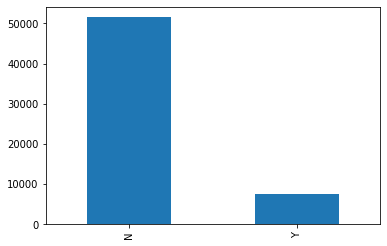

In [17]:
# Y 변수 현황

train['fr_yn'].value_counts().plot(kind='bar')

In [18]:
# 결측치 개수

train.isnull().sum()

dt_of_fr                            0
fr_yn                               0
bldng_us                        27677
bldng_archtctr                  27665
bldng_cnt                           0
bldng_ar                            0
ttl_ar                              0
lnd_ar                              0
dt_of_athrztn                   27581
ttl_grnd_flr                    10210
ttl_dwn_flr                     11005
bldng_us_clssfctn               29343
tmprtr                             13
prcpttn                         53629
wnd_spd                            33
wnd_drctn                         221
hmdt                               22
gas_engry_us_201401             27581
ele_engry_us_201401             27581
gas_engry_us_201402             27581
ele_engry_us_201402             27581
gas_engry_us_201403             27581
ele_engry_us_201403             27581
gas_engry_us_201404             27581
ele_engry_us_201404             27581
gas_engry_us_201405             27581
ele_engry_us

In [26]:
# 결측치 개수 및 퍼센트 계산, 순위

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
lw_13121011,58926,0.995388
lw_13121010,58926,0.995388
lw_13111110,58918,0.995253
lw_13101410,58916,0.995220
lw_13141011,58908,0.995084
lw_13101110,58908,0.995084
lw_13141010,58907,0.995067
lw_13101310,58907,0.995067
lw_13131010,58903,0.995000
lw_13131110,58903,0.995000


# 건물 데이터 EDA

## - 건물 용도

In [27]:
# bldng_us "건물 용도" 변수 확인

train['bldng_us'].unique()

array(['단독주택', nan, '공동주택', '종교시설', '공장', '제1종근린생활시설', '숙박시설',
       '동.식물 관련시설', '창고시설', '제2종근린생활시설', '문화및집회시설', '자동차관련시설', '업무시설',
       '판매시설', '교육연구시설', '분뇨.쓰레기처리시설', '수련시설', '의료시설', '노유자시설', '운동시설',
       '위락시설', '위험물저장및처리시설', '공공용시설', '교정및군사시설', '교육연구및복지시설', '장례식장',
       '운수시설', '관광휴게시설', '근린생활시설', '시장', '방송통신시설', '묘지관련시설', '발전시설',
       '판매및영업시설', '파출소'], dtype=object)

Text(0.5, 1.0, '건물용도')

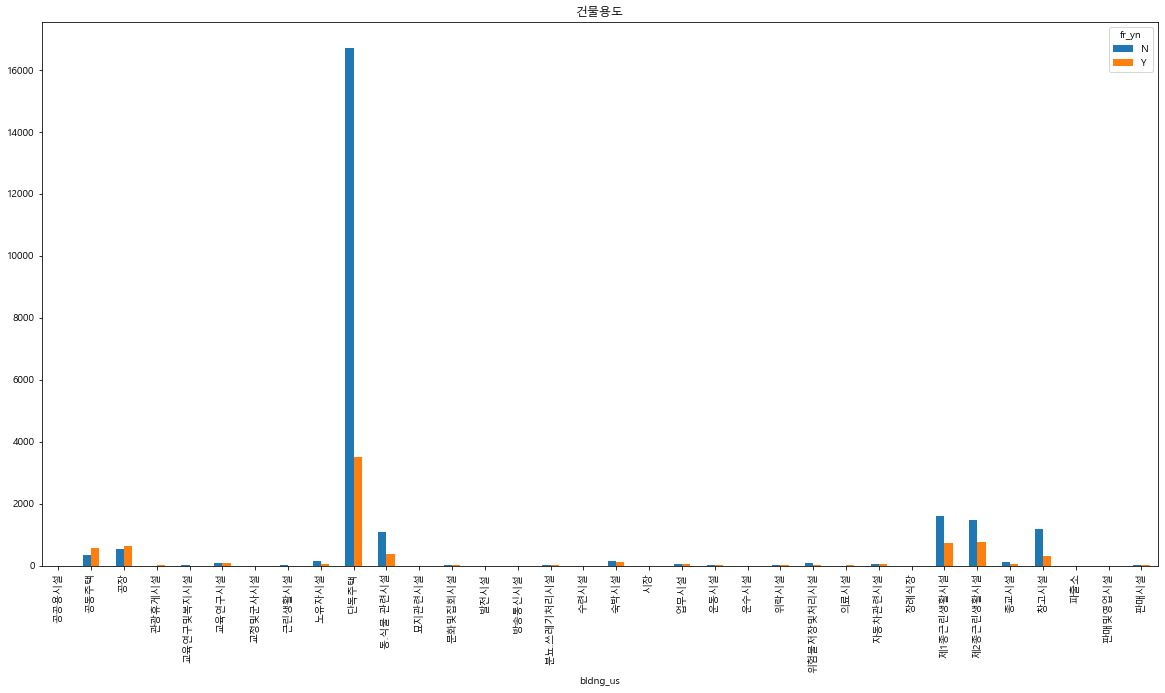

In [12]:
matplotlib.rc('font', family='Malgun Gothic') 

df = train.groupby(['bldng_us','fr_yn'])['fr_yn'].count().unstack('fr_yn')
df.plot(kind='bar', figsize=(20,10))
plt.title('건물용도')

In [56]:
pd.crosstab(train['bldng_us'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
bldng_us,,,
공공용시설,1,0,1
공동주택,358,583,941
공장,527,652,1179
관광휴게시설,9,21,30
교육연구및복지시설,12,6,18
교육연구시설,91,94,185
교정및군사시설,4,3,7
근린생활시설,23,8,31
노유자시설,154,51,205


단순히 "건물 용도"를 개수로만 비교하면, 불이 발생한 순위는 다음과 같다.

1. 단독주택
2. 제2종근린생활시설
3. 제1종근린생활시설
4. 공장
5. 공동주택
6. 동.식물 관련시설
7. 창고시설 
8. 숙박시설

## - 건물용도분류명

In [13]:
# bldng_us_clssfctn "건물용도분류명" 변수 확인

train['bldng_us_clssfctn'].unique()

array(['주거용', nan, '상업용', '문교사회용', '공업용', '농수산용', '기타', '공공용'],
      dtype=object)

Text(0.5, 1.0, '건물용도 분류명')

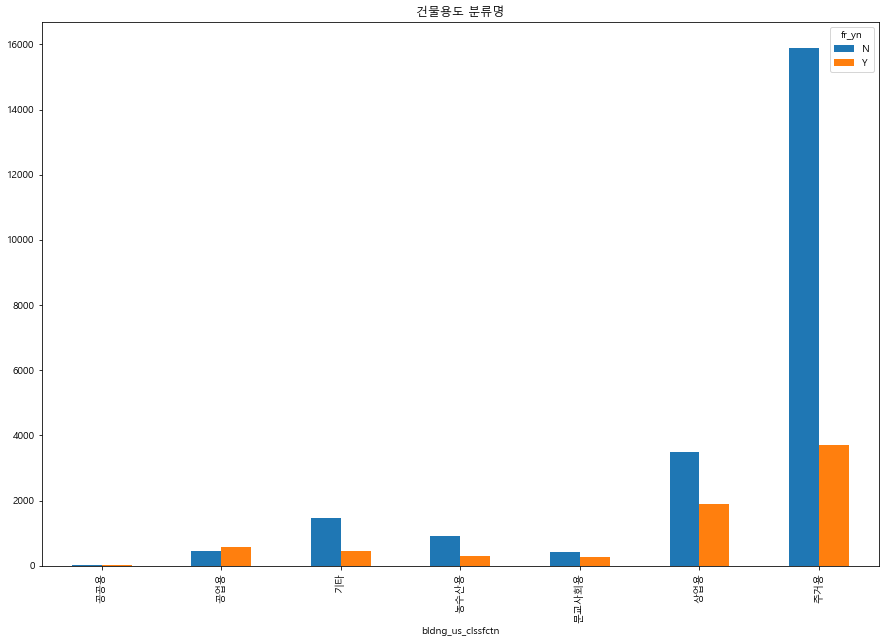

In [14]:
df = train.groupby(['bldng_us_clssfctn','fr_yn'])['fr_yn'].count().unstack('fr_yn')
df.plot(kind='bar', figsize=(15,10))
plt.title('건물용도 분류명')

In [10]:
pd.crosstab(train['bldng_us_clssfctn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
bldng_us_clssfctn,,,
공공용,17,17,34
공업용,461,582,1043
기타,1452,447,1899
농수산용,914,311,1225
문교사회용,414,263,677
상업용,3505,1884,5389
주거용,15889,3700,19589
All,22652,7204,29856


단순히 "건물 용도 분류명"을 개수로만 비교하면, 불이 발생한 순위는 다음과 같다.

1. 주거용
2. 상업용
3. 기타
4. 농수산용
5. 공업용
6. 문교사회용
7. 공공용

## '건물 용도'와 '건물 용도 분류명' 들여다보기

여기서 의문이 생긴다. "건물 용도"와 "건물 용도 분류명"을 합칠 수 있지 않을까?

그리고 "건물 용도 분류명"에서 '기타'는 무엇인가?

우선, 두 항목의 crosstable을 그려본다.

In [22]:
pd.crosstab(train['bldng_us_clssfctn'], train['bldng_us'])

bldng_us,공동주택,공장,관광휴게시설,교육연구및복지시설,교육연구시설,근린생활시설,노유자시설,단독주택,동.식물 관련시설,묘지관련시설,...,위락시설,위험물저장및처리시설,의료시설,자동차관련시설,장례식장,제1종근린생활시설,제2종근린생활시설,종교시설,창고시설,판매시설
bldng_us_clssfctn,,,,,,,,,,,,,,,,,,,,,
공공용,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
공업용,0,1032,0,0,0,0,0,5,0,0,...,0,1,0,1,0,1,1,0,1,0
기타,3,29,0,0,1,0,1,398,27,0,...,0,0,0,0,0,9,4,0,1369,0
농수산용,0,0,0,0,0,0,0,65,1157,0,...,0,0,0,0,0,1,0,0,2,0
문교사회용,0,0,20,16,174,1,187,1,0,9,...,0,0,27,0,3,6,10,145,1,0
상업용,71,5,8,0,3,21,7,369,6,0,...,31,102,0,112,0,2152,2064,10,20,51
주거용,858,1,0,0,0,6,0,18474,128,0,...,1,0,0,1,0,45,56,0,15,1


- 공업용은 대부분 공장
- 기타는 대부분 창고 시설
- 농수산용은 대부분 동,식물 관련 시설
- 문교사회용은 교육연구시설 + 노유자시설 + 종교시설 등
- 상업용은 제1종근린생활시설 + 제2종근린생활시설, 그리고 나머지
- 주거용은 공동주택 + 단독주택

위와 같이 나눠진다.

따라서, "건물 용도 분류명"을 기준으로 데이터를 정리하고, "건물 용도"는 삭제해도 될 것 같다.

유의해야 할 점은, '분뇨.쓰레기처리시설', '위험물저장및처리시설', '발전시설'과 같은 특이한 변수와 화재 간 연관성 여부이다.

위에서는 단순히 개수 기준으로만 화재와의 연관성을 살펴보았지만, 개수가 많으면 당연히 화재가 많이 발생하므로, 비율을 기준으로 다시 살펴봐야 할 필요가 있다.

## - 건물 구조

Text(0.5, 1.0, '건물구조')

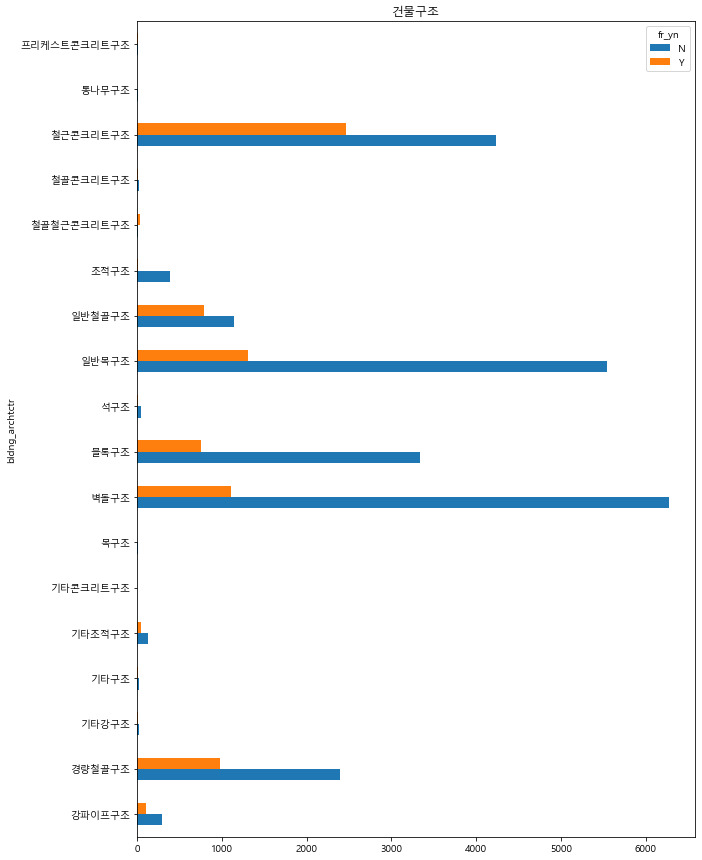

In [83]:
# bldng_archtctr 건물 구조

df = train.groupby(['bldng_archtctr','fr_yn'])['fr_yn'].count().unstack('fr_yn')
df.plot(kind='barh', figsize=(10,15))
plt.title('건물구조')

In [57]:
pd.crosstab(train['bldng_archtctr'], train['fr_yn'], margins = True)

fr_yn,N,Y,All
bldng_archtctr,,,
강파이프구조,295,100,395
경량철골구조,2398,980,3378
기타강구조,25,11,36
기타구조,20,7,27
기타조적구조,130,46,176
기타콘크리트구조,1,0,1
목구조,15,2,17
벽돌구조,6270,1107,7377
블록구조,3335,752,4087


단순히 "건물 구조"를 개수로만 비교하면, 불이 발생한 순위는 다음과 같다.

1. 철근콘크리트구조
2. 일반목구조
3. 벽돌구조
4. 경량철골구조
5. 일반철골구조
6. 블록구조

## - 건물 채수

In [62]:
# bldng_cnt 건물채수

building_number = train['bldng_cnt'].value_counts()
print("최고 채수", np.max(building_number))
print("최하 채수", np.min(building_number))
print("평균 채수", np.mean(building_number))
print("중위 채수", np.median(building_number))

최고 채수 19232
최하 채수 1
평균 채수 616.65625
중위 채수 5.5


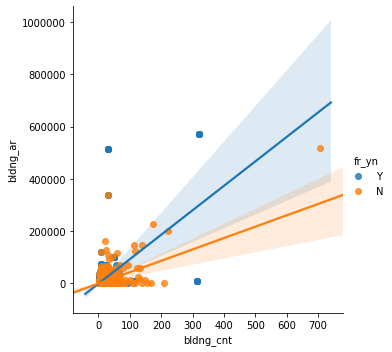

In [4]:
import seaborn as sns

sns.lmplot(data = train, x = 'bldng_cnt', y = 'bldng_ar', hue = 'fr_yn')

건물 채수가 많을수록, 건물 건축면적이 클수록 불이 잘 난다.

## - 건물 층수

In [60]:
# ttl_grnd_flr 지상 층수

ground_floor = train['ttl_grnd_flr'].value_counts()
print("최고 층수", np.max(ground_floor))
print("최하 층수", np.min(ground_floor))
print("평균 층수", np.mean(ground_floor))
print("중위 층수", np.median(ground_floor))

최고 층수 27700
최하 층수 1
평균 층수 244.945
중위 층수 3.0


In [63]:
pd.crosstab(train['ttl_grnd_flr'], train['fr_yn'])

fr_yn,N,Y
ttl_grnd_flr,,
0.0,98,5
1.0,24678,3022
2.0,10437,1539
3.0,2927,819
4.0,1783,541
5.0,571,276
6.0,329,186
7.0,175,89
8.0,120,91


In [61]:
# ttl_dwn_flr 지하 층수

down_floor = train['ttl_dwn_flr'].value_counts()
print("최고 층수", np.max(down_floor))
print("최하 층수", np.min(down_floor))
print("평균 층수", np.mean(down_floor))
print("중위 층수", np.median(down_floor))

최고 층수 44579
최하 층수 1
평균 층수 1661.8620689655172
중위 층수 7.0


In [64]:
pd.crosstab(train['ttl_dwn_flr'], train['fr_yn'])

fr_yn,N,Y
ttl_dwn_flr,,
0.0,38490,6089
1.0,2307,712
2.0,140,121
3.0,39,47
4.0,16,32
5.0,16,20
6.0,11,13
7.0,3,10
8.0,10,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002671E6D91D0>,
      dtype=object)

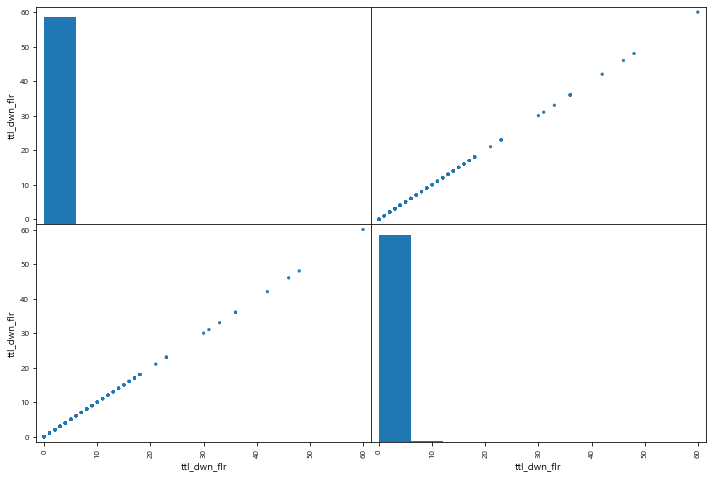

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["ttl_dwn_flr", "ttl_dwn_flr"]

scatter_matrix(train[attributes], figsize = (12, 8))

## 새로운 'floor' 변수 생성: 지상 층수 + 지하 층수

In [44]:
train['floor'] = train["ttl_dwn_flr"] + train["ttl_dwn_flr"]

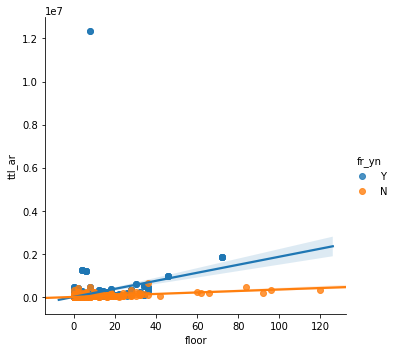

In [5]:
sns.lmplot(data = train, x = 'floor', y = 'ttl_ar', hue = 'fr_yn')

층수가 많을수록, 건물 연면적이 클수록 불이 잘 난다.

하지만, 층수 데이터가 한쪽에 몰려있으므로, 데이터를 잘라서 살펴봐야 할 것 같다고 판단된다.

## floor 변수 분포 살펴보기

In [36]:
train['floor_band'] = 'na'
train.loc[train['floor']<=10, 'floor_band'] = 'less_10'
train.loc[(train['floor']>10) & (train['floor']<=20), 'floor_band'] = 'less_20'
train.loc[(train['floor']>20) & (train['floor']<=30), 'floor_band'] = 'less_30'
train.loc[(train['floor']>30) & (train['floor']<=40), 'floor_band'] = 'less_40'
train.loc[(train['floor']>40) & (train['floor']<=50), 'floor_band'] = 'less_50'
train.loc[(train['floor']>50) & (train['floor']<=60), 'floor_band'] = 'less_60'
train.loc[train['floor']>60, 'floor_band'] = 'more_60'

In [37]:
train.floor_band.value_counts().to_frame().style.background_gradient(cmap='summer')

,floor_band
less_10,48029
na,11005
less_20,80
less_30,43
less_40,23
more_60,12
less_50,6
less_60,1


0부터 60층까지 잘라서 분포를 살펴본다.

(0, 60)

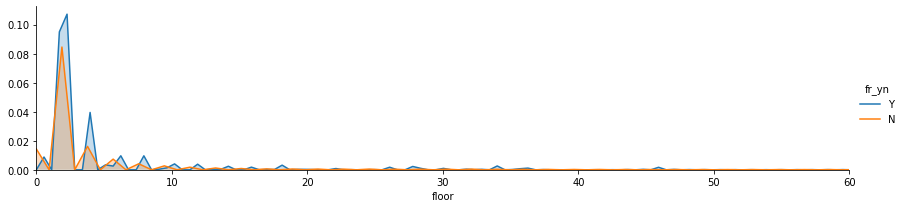

In [62]:
facet = sns.FacetGrid(train, hue = "fr_yn", aspect = 4)
facet.map(sns.kdeplot, 'floor', shade = True)
facet.set(xlim = (0, train['floor'].max()))
facet.add_legend()

plt.xlim(0, 60)

0부터 10층까지 잘라서 분포를 살펴본다.

(0, 10)

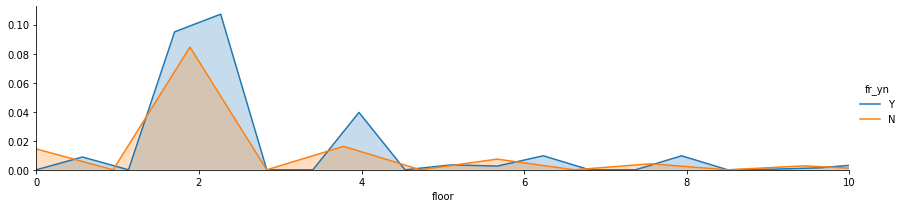

In [61]:
facet = sns.FacetGrid(train, hue = "fr_yn", aspect = 4)
facet.map(sns.kdeplot, 'floor', shade = True)
facet.set(xlim = (0, train['floor'].max()))
facet.add_legend()

plt.xlim(0, 10)

층수가 많을수록, 불이 잘 난다고 말하기는 힘들 것 같다...!

다만, 총 층수가 2층과 4층일 때 불이 많이 나는 편이다.

# 행정구역 EDA

## - 행정구역

In [3]:
train['emd_nm'].unique()

array(['경상남도 창녕군 창녕읍', '경상남도 의령군 가례면', '경상남도 창원시의창구 대산면', '경상남도 함안군 칠서면',
       '경상남도 창녕군 남지읍', '경상남도 진주시 판문동', '경상남도 남해군 창선면', '경상남도 거창군 주상면',
       '경상남도 창녕군 고암면', '경상남도 밀양시 무안면', '경상남도 함안군 가야읍', '경상남도 창녕군 성산면',
       '경상남도 창녕군 대합면', '경상남도 밀양시 삼문동', '경상남도 통영시 북신동', '경상남도 함안군 칠북면',
       '경상남도 통영시 욕지면', '경상남도 양산시 서창동', '경상남도 창녕군 이방면', '경상남도 창녕군 유어면',
       '경상남도 거창군 남상면', '경상남도 의령군 용덕면', '경상남도 창녕군 계성면', '경상남도 하동군 악양면',
       '경상남도 창녕군 영산면', '경상남도 거제시 일운면', '경상남도 창녕군 장마면', '경상남도 통영시 광도면',
       '경상남도 창녕군 도천면', '경상남도 통영시 한산면', '경상남도 창녕군 길곡면', '경상남도 창녕군 부곡면',
       '경상남도 양산시 삼성동', '경상남도 거창군 가조면', '경상남도 창녕군 대지면', '경상남도 고성군 대가면',
       '경상남도 거제시 능포동', '경상남도 양산시 하북면', '경상남도 거제시 장평동', '경상남도 거제시 옥포2동',
       '경상남도 거제시 옥포1동', '경상남도 밀양시 하남읍', '경상남도 거제시 장승포동', '경상남도 거창군 위천면',
       '경상남도 거창군 고제면', '경상남도 창원시마산합포구 오동동', '경상남도 거제시 둔덕면',
       '경상남도 거제시 고현동', '경상남도 사천시 서포면', '경상남도 거제시 아주동', '경상남도 사천시 벌룡동',
       '경상남도 밀양시 산내면', '경상남도 창원시마산회원구 합성1동', '경상남도 고성군 동해면',
       '경상남도 사천시 용현면'